# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Carga las dependencias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
from datetime import datetime

# Importa la llave del API
from api_keys import api_key

# Incorpora el paquete citipy para determinar la ciudad basado en latitud y longitud
from citipy import citipy

# Archivo de saluda cities (CSV)
output_data_file = "output_data/cities.csv"

# Establece el rango de latitud y longitud 
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Se definen las litas de latitud y longitud y las ciudades
lat_lngs = []
cities = []

# Crea un numero aleatoria de latitudes y longitudes 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identifica las ciudades mas cercanas de acuerdo a las latitud y longitud
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Si la ciudad es unica, la agrega al listado de ciudades
    if city not in cities:
        cities.append(city)

# Imprime el numero de ciudades 
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Se realiza la configuración de la Api
settings = {"units": "imperial", "appid": api_key}

# Se determinan los parametros para llamar a la de acuerdo a la configuración
params = ['name','clouds.all','sys.country','dt','main.humidity','main.temp','wind.speed']

# Se crea el data set que va a almacenar el resultado de la api
df_weather =pd.DataFrame(columns = ["City","Cloudiness", "Country", "Date", 
                                      "Humidity", "Lat","Lng", "Max Temp", 
                                      "Wind Speed"])

In [4]:
# Se define el contador que indica el numero de llamados a la Api, el numero de erores donde no encuentra la ciudad,  
# el numero de ciudades que encontro y le indice del dataframe
count = 1
error = 0 
sets = 0
index = 0

# Se imprime una leyenda cuando el proceso empieza
print("Beginning Data Retrieval    ")
print("----------------------------")

#Se establece una variable de tiempo para establecer el tiempo que tarde en los bloques de 50
ts =time.time()

for city in cities:
    try:
        # Se re-emplazan los caracteres especiales.
        cityfix = city.replace(" ", "%20") 
        print(f'Processing Record {count} of Set {sets} | {cityfix}' )
        # print(f'{owm.BASE_URL}weather?q={cityfix}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(cityfix, **settings)
        df_weather.set_value(index, "City", city_stats["name"])
        df_weather.set_value(index, "Cloudiness", city_stats("clouds.all"))
        df_weather.set_value(index, "Country", city_stats("sys.country"))
        df_weather.set_value(index, "Date", city_stats("dt"))
        df_weather.set_value(index, "Humidity", city_stats("main.humidity"))
        df_weather.set_value(index, "Lat", city_stats("coord.lat"))
        df_weather.set_value(index, "Lng", city_stats("coord.lon"))
        df_weather.set_value(index, "Max Temp", city_stats("main.temp_max"))
        df_weather.set_value(index, "Wind Speed", city_stats("wind.speed"))
        index = index + 1 
    except Exception as e:
        print("City not found. Skipping...")
#       print(e)
        error = error + 1
        
    count = count + 1
    # Se determina que cada 50 invocaciones se espere unos segundos para continuar ya que algunas API tienen limite de transacciones por minuto
    if count == 51: 
#        tf=time.time()
        count = 1 
        sets = sets+1
#        time.sleep(60-(tf-ts))
#        ts=time.time()

# Se imprime una leyenda cuando el proceso fue terminado
print("----------------------------")
print("Data Retrieval Complete     ")


Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 0 | puerto%20montt
http://api.openweathermap.org/data/2.5/weather?q=puerto%20montt&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 2 of Set 0 | sur
http://api.openweathermap.org/data/2.5/weather?q=sur&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3


C:\Users\Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Joe\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Joe\Anaconda3\lib\site-packages

Processing Record 3 of Set 0 | sao%20filipe
http://api.openweathermap.org/data/2.5/weather?q=sao%20filipe&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 4 of Set 0 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 5 of Set 0 | victoria
http://api.openweathermap.org/data/2.5/weather?q=victoria&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 6 of Set 0 | margate
http://api.openweathermap.org/data/2.5/weather?q=margate&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 7 of Set 0 | mbala
http://api.openweathermap.org/data/2.5/weather?q=mbala&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 8 of Set 0 | port%20alfred
http://api.openweathermap.org/data/2.5/weather?q=port%20alfred&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skippi

City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 1 of Set 1 | centralia
http://api.openweathermap.org/data/2.5/weather?q=centralia&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 2 of Set 1 | tinskoy
http://api.openweathermap.org/data/2.5/weather?q=tinskoy&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 3 of Set 1 | lagoa
http://api.openweathermap.org/data/2.5/weather?q=lagoa&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 4 of Set 1 | norman%20wells
http://api.openweathermap.org/data/2.5/weather?q=norman%20wells&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 5 of Set 1 | bethel
http://api.openweathermap.org/data/2.5/weather?q=bethel&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 6 of Set 1 | turukhansk
http://api.openweathermap.org/data/2.5/weather?q=turukhansk&units=imperial&APPID=72281b3

Processing Record 2 of Set 2 | huarmey
http://api.openweathermap.org/data/2.5/weather?q=huarmey&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 3 of Set 2 | talnakh
http://api.openweathermap.org/data/2.5/weather?q=talnakh&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 4 of Set 2 | ucluelet
http://api.openweathermap.org/data/2.5/weather?q=ucluelet&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 5 of Set 2 | anchorage
http://api.openweathermap.org/data/2.5/weather?q=anchorage&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 6 of Set 2 | fortuna
http://api.openweathermap.org/data/2.5/weather?q=fortuna&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 7 of Set 2 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 8 of Set 2 | saint%20augustine
http://api.openweathermap.org/dat

Processing Record 1 of Set 3 | kaitangata
http://api.openweathermap.org/data/2.5/weather?q=kaitangata&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 2 of Set 3 | hasaki
http://api.openweathermap.org/data/2.5/weather?q=hasaki&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 3 of Set 3 | ilulissat
http://api.openweathermap.org/data/2.5/weather?q=ilulissat&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 4 of Set 3 | torbay
http://api.openweathermap.org/data/2.5/weather?q=torbay&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 5 of Set 3 | shingu
http://api.openweathermap.org/data/2.5/weather?q=shingu&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 6 of Set 3 | zonguldak
http://api.openweathermap.org/data/2.5/weather?q=zonguldak&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 7 of Set 3 | mar%20del%20plata
http://api.openweathermap.org/data/2.5/weat

Processing Record 1 of Set 4 | asau
http://api.openweathermap.org/data/2.5/weather?q=asau&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 2 of Set 4 | raudeberg
http://api.openweathermap.org/data/2.5/weather?q=raudeberg&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 3 of Set 4 | jian
http://api.openweathermap.org/data/2.5/weather?q=jian&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 4 of Set 4 | berlevag
http://api.openweathermap.org/data/2.5/weather?q=berlevag&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 5 of Set 4 | tres%20picos
http://api.openweathermap.org/data/2.5/weather?q=tres%20picos&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 6 of Set 4 | meulaboh
http://api.openweathermap.org/data/2.5/weather?q=meulaboh&units=imperial&APPID=72281b30332f8b81c30

Processing Record 50 of Set 4 | chany
http://api.openweathermap.org/data/2.5/weather?q=chany&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 1 of Set 5 | porto%20novo
http://api.openweathermap.org/data/2.5/weather?q=porto%20novo&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 2 of Set 5 | amderma
http://api.openweathermap.org/data/2.5/weather?q=amderma&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 3 of Set 5 | alim
http://api.openweathermap.org/data/2.5/weather?q=alim&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 4 of Set 5 | adelaide
http://api.openweathermap.org/data/2.5/weather?q=adelaide&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 5 of Set 5 | tarudant
http://api.openweathermap.org/data/2.5/weather?q=tarudant&units=imperial&APPID=72281b30332f8b81c308

Processing Record 50 of Set 5 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?q=deputatskiy&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 1 of Set 6 | cayenne
http://api.openweathermap.org/data/2.5/weather?q=cayenne&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 2 of Set 6 | save
http://api.openweathermap.org/data/2.5/weather?q=save&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 3 of Set 6 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?q=ostrovnoy&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 4 of Set 6 | celestun
http://api.openweathermap.org/data/2.5/weather?q=celestun&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 5 of Set 6 | saleaula
http://api.openweathermap.org/data/2.5/weather?q=saleaula&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 6 of Set 6 | laje

Processing Record 2 of Set 7 | vaitupu
http://api.openweathermap.org/data/2.5/weather?q=vaitupu&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 3 of Set 7 | faanui
http://api.openweathermap.org/data/2.5/weather?q=faanui&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 4 of Set 7 | progreso
http://api.openweathermap.org/data/2.5/weather?q=progreso&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 5 of Set 7 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?q=vestmannaeyjar&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 6 of Set 7 | namibe
http://api.openweathermap.org/data/2.5/weather?q=namibe&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 7 of Set 7 | san%20fernando
http://api.openweathermap.org/data/2.5/weather?q=san%20fernando&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skip

Processing Record 50 of Set 7 | kanniyakumari
http://api.openweathermap.org/data/2.5/weather?q=kanniyakumari&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 1 of Set 8 | santa%20maria%20do%20para
http://api.openweathermap.org/data/2.5/weather?q=santa%20maria%20do%20para&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 2 of Set 8 | nemuro
http://api.openweathermap.org/data/2.5/weather?q=nemuro&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 3 of Set 8 | ngukurr
http://api.openweathermap.org/data/2.5/weather?q=ngukurr&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 4 of Set 8 | richards%20bay
http://api.openweathermap.org/data/2.5/weather?q=richards%20bay&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 5 of Set 

Processing Record 49 of Set 8 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?q=tazovskiy&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 50 of Set 8 | mayo
http://api.openweathermap.org/data/2.5/weather?q=mayo&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 1 of Set 9 | xining
http://api.openweathermap.org/data/2.5/weather?q=xining&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 2 of Set 9 | saiki
http://api.openweathermap.org/data/2.5/weather?q=saiki&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 3 of Set 9 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?q=maniitsoq&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 4 of Set 9 | puerto%20escondido
http://api.openweathermap.org/data/2.5/weather?q=puerto%20escondido&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 5 of Set

Processing Record 49 of Set 9 | petatlan
http://api.openweathermap.org/data/2.5/weather?q=petatlan&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 50 of Set 9 | remedios
http://api.openweathermap.org/data/2.5/weather?q=remedios&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 1 of Set 10 | comodoro%20rivadavia
http://api.openweathermap.org/data/2.5/weather?q=comodoro%20rivadavia&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 2 of Set 10 | jonkoping
http://api.openweathermap.org/data/2.5/weather?q=jonkoping&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 3 of Set 10 | taltal
http://api.openweathermap.org/data/2.5/weather?q=taltal&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 4 of Set 10 | tucuman
http://api.openweathermap.org/data/2.5/weather?q=tucuman&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processi

Processing Record 48 of Set 10 | lowestoft
http://api.openweathermap.org/data/2.5/weather?q=lowestoft&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 49 of Set 10 | shimanovsk
http://api.openweathermap.org/data/2.5/weather?q=shimanovsk&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 50 of Set 10 | sabang
http://api.openweathermap.org/data/2.5/weather?q=sabang&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 1 of Set 11 | bonthe
http://api.openweathermap.org/data/2.5/weather?q=bonthe&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 2 of Set 11 | evensk
http://api.openweathermap.org/data/2.5/weather?q=evensk&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 3 of Set 11 | hofn
http://api.openweathermap.org/data/2.5/weather?q=hofn&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 4 of Set 11 | san%20isidro
http://api.openweathermap.org/data/2.5/weather?q

Processing Record 49 of Set 11 | llanes
http://api.openweathermap.org/data/2.5/weather?q=llanes&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 50 of Set 11 | santiago%20del%20estero
http://api.openweathermap.org/data/2.5/weather?q=santiago%20del%20estero&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 1 of Set 12 | victor%20harbor
http://api.openweathermap.org/data/2.5/weather?q=victor%20harbor&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 2 of Set 12 | sibolga
http://api.openweathermap.org/data/2.5/weather?q=sibolga&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 3 of Set 12 | la%20paz
http://api.openweathermap.org/data/2.5/weather?q=la%20paz&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
City not found. Skipping...
HTTP Error 404: Not Found
Processing Record 4 of Set 12 | t

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Muestra el numero de ciudades con la información del clima
df_weather.count()

City          454
Cloudiness    454
Country       454
Date          454
Max Temp      454
Wind Speed    454
Lat           454
Lng           454
Humidity      454
dtype: int64

In [9]:
# almacena el archivo csv en disco
df_weather.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Muestra las primeras ciudades 
df_weather.head(5)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Sur,8,OM,1554144102,79.25,4.23,22.57,59.53,81
1,Hithadhoo,76,MV,1554143612,83.57,6.08,-0.6,73.08,100
2,Victoria,75,BN,1554141600,77,6.76,5.28,115.24,88
3,Margate,20,AU,1554144079,46.4,9.17,-43.03,147.26,81
4,Mbala,64,ZM,1554144103,65.93,2.33,-8.85,31.37,94


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

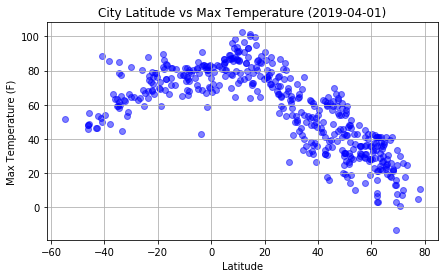

In [18]:
# Muestra un grafico de la latitud vs la temperatura
plt.figure(figsize=(7,4))
plt.scatter(df_weather["Lat"], df_weather["Max Temp"], color='b', alpha=0.5)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatitudVsTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

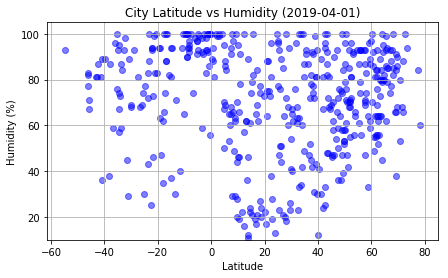

In [23]:
# Muestra un grafico de la latitud vs la humedad
plt.figure(figsize=(7,4))
plt.scatter(df_weather["Lat"], df_weather["Humidity"], color='blue', alpha=0.5)
plt.ylim(10,105)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatitudeVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

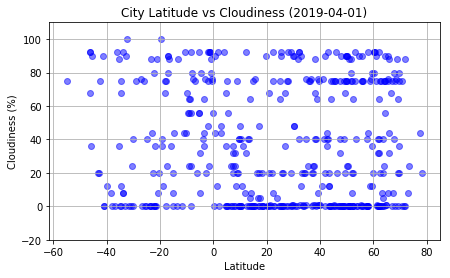

In [26]:
# Muestra un grafico de la latitud vs la humedad
plt.figure(figsize=(7,4))
plt.scatter(df_weather["Lat"], df_weather["Cloudiness"], color='b', alpha=0.5)
plt.ylim(-20,(df_weather["Cloudiness"].max()+10))
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatitudevsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

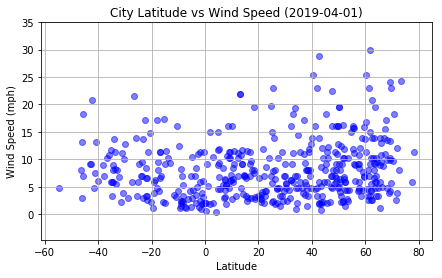

In [28]:
# Muestra un grafico de la latitud vs la humedad
plt.figure(figsize=(7,4))
plt.scatter(df_weather["Lat"], df_weather["Wind Speed"], color='b', alpha=0.5)
plt.ylim((df_weather["Wind Speed"].min()-5),(df_weather["Wind Speed"].max()+5))
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatitudevsWind.png")
plt.show()